<a href="https://colab.research.google.com/github/bhaveleena3/Python/blob/main/Crime_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering



In [2]:
crime=pd.read_csv('/content/crime_data.csv')

In [3]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


Hierarchical Clustering

In [5]:
# Customized / user defined Normalization function
# Here we can use standardized functions as well from sklearn but to show you how we can write customized function we used this code
def norm_func(i): # function name is norm_func, we can give any name here.
    x = (i-i.min())/(i.max()-i.min()) # (Xi-min)/range (Feature Scaling), Range=max-min
    return x

In [6]:
#i.min(),i.max()
crime['Murder'].min(),crime['Murder'].max()

(0.8, 17.4)

In [7]:
(13.2-0.8)/(17.4-0.8)

0.7469879518072289

In [10]:
# Normalized data frame (considering the numerical part of data)
df_norm = norm_func(crime.iloc[:,1:]) # except 0 column (location of US) we normalized other 4 columns .All are numaric.norm

In [11]:
df_norm

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


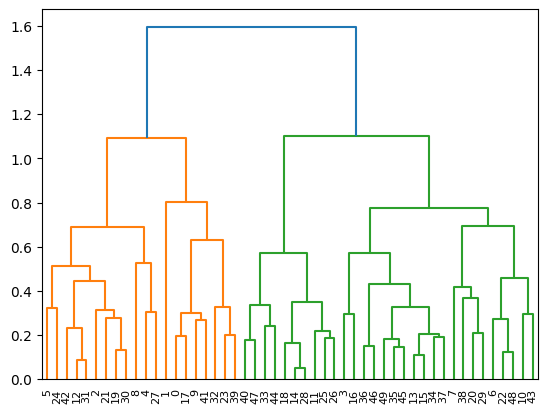

In [19]:
# create dendrogram
dendrogram = sch.dendrogram(sch.linkage(df_norm, method='complete'))

In [21]:
# create clusters, suppose got input from customer that go for 4 clusters
hc = AgglomerativeClustering(n_clusters=4, affinity = 'euclidean', linkage = 'complete')

In [22]:
# save clusters for chart
y_hc = hc.fit_predict(df_norm) # apply fit_predict method on dataset df_norm. We will get cluster nos. in y_hc
Clusters=pd.DataFrame(y_hc,columns=['Clusters']) # append those no. of cluster numbers create dataframe

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


In [23]:
y_hc


array([0, 0, 3, 1, 3, 3, 1, 1, 3, 0, 1, 2, 3, 1, 2, 1, 1, 0, 2, 3, 1, 3,
       1, 0, 3, 2, 2, 3, 2, 1, 3, 3, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 3, 1,
       2, 1, 1, 2, 1, 1])

In [24]:
Clusters

,Clusters
0,0
1,0
2,3
3,1
4,3
5,3
6,1
7,1
8,3
9,0


In [25]:
crime['ClusterID']=Clusters

In [26]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,ClusterID
0,Alabama,13.2,236,58,21.2,0
1,Alaska,10.0,263,48,44.5,0
2,Arizona,8.1,294,80,31.0,3
3,Arkansas,8.8,190,50,19.5,1
4,California,9.0,276,91,40.6,3
5,Colorado,7.9,204,78,38.7,3
6,Connecticut,3.3,110,77,11.1,1
7,Delaware,5.9,238,72,15.8,1
8,Florida,15.4,335,80,31.9,3
9,Georgia,17.4,211,60,25.8,0


In [27]:
crime_df=crime.sort_values(['ClusterID'])
crime_df.iloc[:,1:]  #Total 4 clusters: 0,1,2,3

,Murder,Assault,UrbanPop,Rape,ClusterID
0,13.2,236,58,21.2,0
17,15.4,249,66,22.2,0
23,16.1,259,44,17.1,0
32,13.0,337,45,16.1,0
39,14.4,279,48,22.5,0
9,17.4,211,60,25.8,0
1,10.0,263,48,44.5,0
41,13.2,188,59,26.9,0
43,3.2,120,80,22.9,1
38,3.4,174,87,8.3,1


# **K-Means Clustering**

In [28]:
from  sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Y= scaler.fit_transform(crime.iloc[:,1:])
Y

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116, -1.48365074],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392, -1.48365074],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  1.4446073 ],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398, -0.50756473],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393,  1.4446073 ],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137,  1.4446073 ],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.50756473],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.50756473],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  1.4446073 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -1.48365074],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987, -0.50756473],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217,  0.46852129],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525,  1.4446073 ],
       [-0.13637203, -0.70012057, -0.0

In [31]:
from sklearn.cluster import KMeans
wcss=[]
for i in range(1, 11):
     kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
     kmeans.fit(Y)
     wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

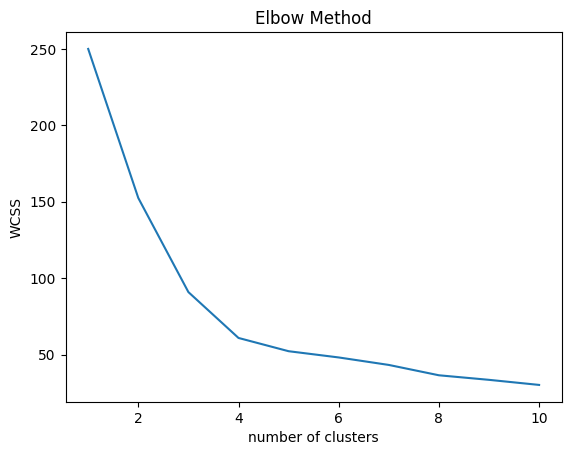

In [32]:
import matplotlib.pyplot as plt
plt.plot(range(1, 11),wcss)
plt.title('Elbow Method')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()  #elbow curve

In [33]:
kmeans = KMeans(n_clusters=4,random_state=0)
new_predict= kmeans.fit_predict(Y)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [34]:
new_predict


array([2, 2, 1, 2, 1, 1, 0, 0, 1, 2, 0, 3, 1, 0, 3, 0, 0, 2, 3, 1, 0, 1,
       0, 2, 1, 3, 3, 1, 3, 0, 1, 1, 2, 3, 0, 0, 0, 0, 0, 2, 3, 2, 1, 0,
       3, 0, 0, 3, 0, 0], dtype=int32)

In [35]:
crime['ClusterKID']=new_predict

In [36]:
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,ClusterID,ClusterKID
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,2
2,Arizona,8.1,294,80,31.0,3,1
3,Arkansas,8.8,190,50,19.5,1,2
4,California,9.0,276,91,40.6,3,1
5,Colorado,7.9,204,78,38.7,3,1
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
8,Florida,15.4,335,80,31.9,3,1
9,Georgia,17.4,211,60,25.8,0,2


In [37]:
crime.groupby('ClusterKID').agg(['mean']).reset_index() # mean values of all 4 clusters

<ipython-input-37-aa65fd309f2b>:1: FutureWarning: ['Unnamed: 0'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  crime.groupby('ClusterKID').agg(['mean']).reset_index() # mean values of all 4 clusters


,ClusterKID,Murder,Assault,UrbanPop,Rape,ClusterID
,,mean,mean,mean,mean,mean
0,0,5.552632,129.263158,71.894737,18.026316,1.000000
1,1,10.883333,256.916667,78.333333,32.250000,3.000000
2,2,13.500000,245.777778,53.111111,23.977778,0.111111
3,3,3.180000,78.700000,49.300000,11.630000,2.000000


In [38]:
crime[crime['ClusterKID']==0] # records comes under cluster 0

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,ClusterID,ClusterKID
6,Connecticut,3.3,110,77,11.1,1,0
7,Delaware,5.9,238,72,15.8,1,0
10,Hawaii,5.3,46,83,20.2,1,0
13,Indiana,7.2,113,65,21.0,1,0
15,Kansas,6.0,115,66,18.0,1,0
16,Kentucky,9.7,109,52,16.3,1,0
20,Massachusetts,4.4,149,85,16.3,1,0
22,Minnesota,2.7,72,66,14.9,1,0
29,New Jersey,7.4,159,89,18.8,1,0
34,Ohio,7.3,120,75,21.4,1,0


In [39]:
crime[crime['ClusterKID']==1] # records comes under cluster 1

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,ClusterID,ClusterKID
2,Arizona,8.1,294,80,31.0,3,1
4,California,9.0,276,91,40.6,3,1
5,Colorado,7.9,204,78,38.7,3,1
8,Florida,15.4,335,80,31.9,3,1
12,Illinois,10.4,249,83,24.0,3,1
19,Maryland,11.3,300,67,27.8,3,1
21,Michigan,12.1,255,74,35.1,3,1
24,Missouri,9.0,178,70,28.2,3,1
27,Nevada,12.2,252,81,46.0,3,1
30,New Mexico,11.4,285,70,32.1,3,1


In [40]:
crime[crime['ClusterKID']==2] # records comes under cluster 2

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,ClusterID,ClusterKID
0,Alabama,13.2,236,58,21.2,0,2
1,Alaska,10.0,263,48,44.5,0,2
3,Arkansas,8.8,190,50,19.5,1,2
9,Georgia,17.4,211,60,25.8,0,2
17,Louisiana,15.4,249,66,22.2,0,2
23,Mississippi,16.1,259,44,17.1,0,2
32,North Carolina,13.0,337,45,16.1,0,2
39,South Carolina,14.4,279,48,22.5,0,2
41,Tennessee,13.2,188,59,26.9,0,2


In [41]:
crime[crime['ClusterKID']==3] # records comes under cluster 3

,Unnamed: 0,Murder,Assault,UrbanPop,Rape,ClusterID,ClusterKID
11,Idaho,2.6,120,54,14.2,2,3
14,Iowa,2.2,56,57,11.3,2,3
18,Maine,2.1,83,51,7.8,2,3
25,Montana,6.0,109,53,16.4,2,3
26,Nebraska,4.3,102,62,16.5,2,3
28,New Hampshire,2.1,57,56,9.5,2,3
33,North Dakota,0.8,45,44,7.3,2,3
40,South Dakota,3.8,86,45,12.8,2,3
44,Vermont,2.2,48,32,11.2,2,3
47,West Virginia,5.7,81,39,9.3,2,3
